In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
from sklearn import metrics
np.random.seed(1)
from google.colab.patches import cv2_imshow
from sklearn.metrics import pairwise_distances

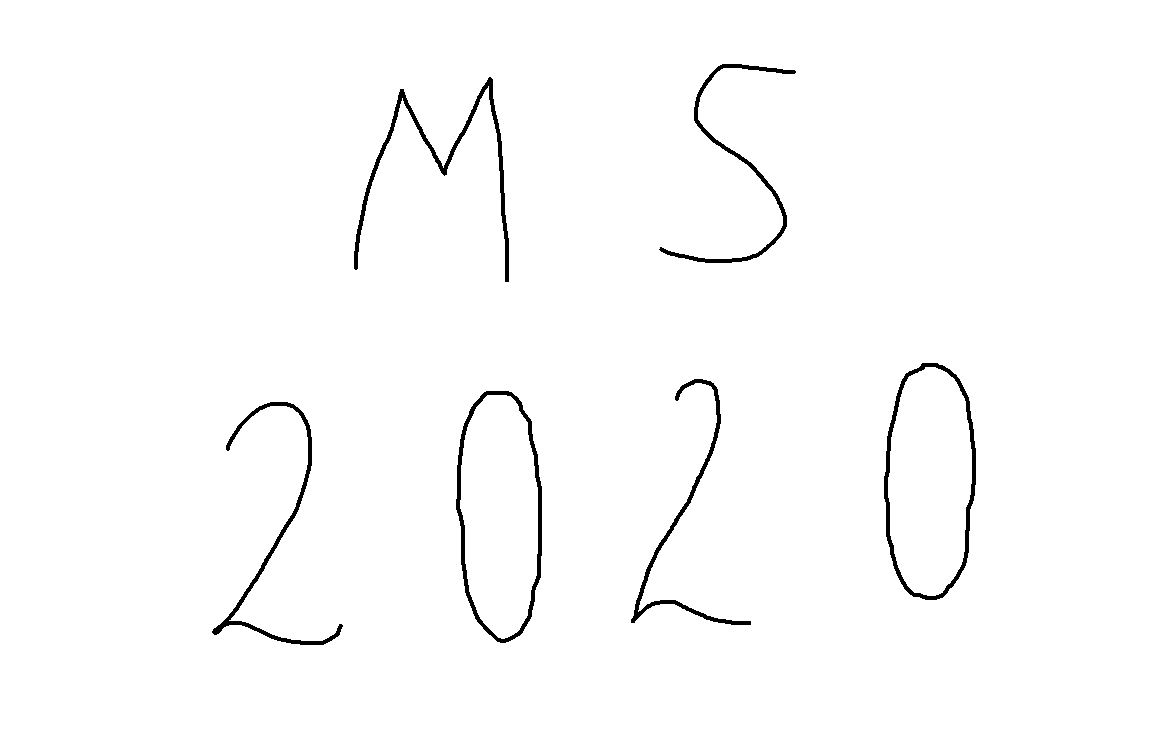

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [112]:
img = cv2.imread("Mukul.png",1)
#Read a gray scale image
im_gray = cv2.imread('Mukul.png', cv2.IMREAD_GRAYSCALE)
#Convert gray scale image to binary
(thresh, im_bw) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY , cv2.THRESH_OTSU)
cv2_imshow(im_bw)
print(im_bw)


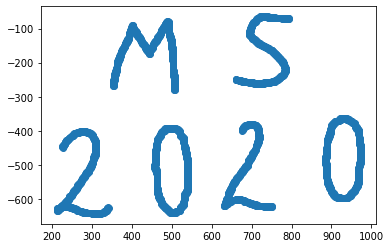

In [113]:
#creating data sets 
rows = im_bw.shape[0]
cols = im_bw.shape[1]

L1 = []
for i in range(0,734,2):
  for j in range(0,1168,2):
     if(im_bw[i][j]==0):
        L1.append([j,-i])

 

plt.scatter(*zip(*L1))


In [156]:
X = np.array(L1)
W = pairwise_distances(X, metric="euclidean")


for i in range(W.shape[0]):
  for j in range(W.shape[1]):
    if(W[i][j]<= 42 and i!=j):
      W[i][j] = 1
    else :
      W[i][j] = 0

print(W)
   

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [157]:

# degree matrix
D = np.diag(np.sum(W,axis = 1).tolist())
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[83.  0.  0. ...  0.  0.  0.]
 [ 0. 84.  0. ...  0.  0.  0.]
 [ 0.  0. 85. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 74.  0.  0.]
 [ 0.  0.  0. ...  0. 72.  0.]
 [ 0.  0.  0. ...  0.  0. 70.]]
laplacian matrix:
[[83. -1. -1. ...  0.  0.  0.]
 [-1. 84. -1. ...  0.  0.  0.]
 [-1. -1. 85. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 74. -1. -1.]
 [ 0.  0.  0. ... -1. 72. -1.]
 [ 0.  0.  0. ... -1. -1. 70.]]


In [158]:
e, v = np.linalg.eigh(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)



eigenvalues:
[-2.38879859e-14 -4.88288340e-15 -4.60984323e-15 ...  1.82474620e+02
  1.83066736e+02  1.85701259e+02]
eigenvectors:
[[-2.23178354e-19  0.00000000e+00  4.85071250e-02 ...  1.28643173e-18
   8.68492190e-18  5.33678530e-19]
 [-2.31101497e-17  0.00000000e+00  4.85071250e-02 ... -7.53825504e-17
  -7.34481948e-17 -6.74096806e-17]
 [ 1.70991520e-17  0.00000000e+00  4.85071250e-02 ...  3.50375191e-17
  -6.85405506e-17 -2.36777395e-17]
 ...
 [ 0.00000000e+00  8.21260147e-28  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  8.10316761e-28  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.99472556e-28  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [159]:

for i in range(50):
  print(e[i])

-2.388798594842514e-14
-4.88288339534359e-15
-4.609843225140942e-15
1.1992743463701229e-14
1.6028223503326756e-14
2.227121613483031e-14
1.26317067099272
1.5254088260890246
1.735166113277165
1.9473391408672052
2.988264861572432
3.232154515492863
3.693505920615335
3.8864199250401
4.36850202522086
5.732073764637819
6.042720513553867
7.672727240808891
10.066729149348633
10.07983703966505
12.173696611240478
12.260229428771892
13.056725823220395
13.418800089909627
13.616625510908953
14.40081276751491
16.81739430218315
21.411166333457334
21.61935060407739
24.036805907216063
26.079391119290577
26.469555273947186
27.425253801822702
28.648062068381293
28.75798064238069
29.28223989336704
30.56104902063367
31.79052448559115
37.93352868273133
38.781590487420175
39.28878806427877
39.530443003972515
39.999999999999936
40.92768006794509
41.041658626171454
41.98620009583819
41.99999999999999
42.06843557227916
42.61036674713131
42.826439862795986


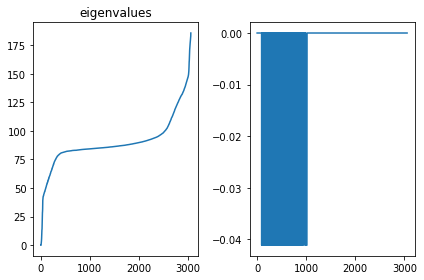

In [160]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-15)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [186]:
# we use k-means to classify the nodes based off their corresponding values in the eigenvector.

k=6
Q = np.zeros((len(L1),k))
for i in range(len(L1)):
  for j in range(k):
    Q[i][j] = v[i][j]

import random
means = np.zeros((k,k))
for i in range(k):
    means[i] = Q[random.randint(0,len(L1))]
print(means)

def dist(p1 ,p2 ,dimension):
  res = 0;
  for i in range(dimension):
    res += (p1[i]-p2[i])**2
  return res




[[ 0.00000000e+00 -4.18853908e-02  0.00000000e+00  0.00000000e+00
   2.33793093e-17  0.00000000e+00]
 [ 0.00000000e+00  1.79749831e-17  0.00000000e+00  4.78364873e-02
   1.98292284e-19  0.00000000e+00]
 [-4.11345035e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.87909391e-28  0.00000000e+00  0.00000000e+00
   4.56911662e-02  0.00000000e+00]
 [ 2.96311693e-17  0.00000000e+00  4.85071250e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.62573172e-18  0.00000000e+00  1.95230133e-17
   4.46758286e-19  4.24094465e-02]]


In [187]:
clusters = np.zeros(len(L1))
group = np.zeros(k)
flag = False
iteration = 0

while(flag==False):
  
  iteration += 1
  newmean = np.zeros((k,k))
  countmean = np.zeros(k)

  for i in range(len(L1)):
    for j in range(k):
      group[j] = dist(Q[i],means[j],k)
    index = 0
    for j in range(k):
      if(group[j]<group[index]):
        index = j
    clusters[i] = index
    newmean[index]+=Q[i]
    countmean[index]+=1

  newmean = (newmean.transpose()/countmean).transpose()
  comparison = newmean == means
  flag = comparison.all()
  means = newmean
  if(iteration>5000):
    flag = True

In [188]:
# implementing spectral clusterings
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
cluster6=[]
#cluster7=[]
cc1=0
cc2=0
cc3=0
cc4=0
cc5=0
cc6=0
#cc7=0
c=0
for i in clusters:
  if(i==0):
    cluster1.insert(cc1,L1[c])
    cc1+=1
  if(i==1):
    cluster2.insert(cc2,L1[c])
    cc2+=1
  if(i==2):
    cluster3.insert(cc3,L1[c])
    cc3+=1
  if(i==3):
    cluster4.insert(cc4,L1[c])
    cc4+=1
  if(i==4):
    cluster5.insert(cc5,L1[c])
    cc5+=1
  if(i==5):
    cluster6.insert(cc6,L1[c])
    cc6+=1
  c+=1

In [189]:
print(c,cc1,cc2,cc3,cc4,cc5,cc6)


3058 570 437 591 479 425 556


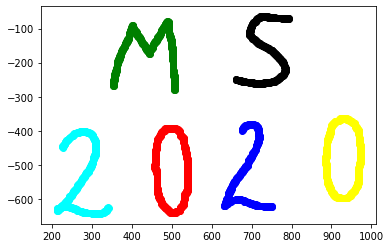

In [190]:
plt.scatter(*zip(*cluster1), color = 'red')
plt.scatter(*zip(*cluster2), color = 'blue')
plt.scatter(*zip(*cluster3), color = 'green')
plt.scatter(*zip(*cluster4), color = 'cyan')
plt.scatter(*zip(*cluster5), color = 'black')
plt.scatter(*zip(*cluster6), color = 'yellow')
#plt.scatter(*zip(*cluster7), color = 'brown')